# Conservation Analysis and Epitope Prediction


#### Author: C. Mazzaferro, K. Fisch
#### Email: cmazzafe@ucsd.edu
#### Date: August 2016
 
## Outline of Notebook
<a id = "toc"></a>
1. <a href = "#candidates">Retreiving Candidates From MSA</a>
2. <a href = "#ortho">Locate orthologues</a>
    * <a href = "#orthop">Orthologues binding affinity prediction</a>
    * <a href = "#MSA">Multiple Sequence Alignment</a>
    * <a href = "#Cons">Conservation Score Prediction</a>
3. <a href = "#ep_pred">WindowinZZg and New Epitope Prediction</a>
    * <a href = "#clustering">Epitope Clustering Analysis</a>

<a id = "candidates"></a>
## Retrieve potential candidates for switching from the original MSA
Good candidates are the ones that overlap with the peptides that display high affinity and low conservation. By selecting peptides from other proteins that are of low affinity, we aim at finding which peptides could potentially replace the ones of high-affinity in order to create a low-affinity protein (thus stealth), but that to the highest extent still mantains its original function.

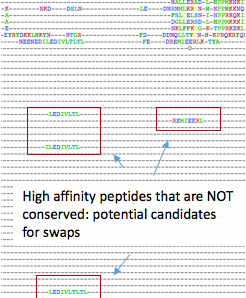

In [6]:
from IPython.display import Image
Image("/Users/carlomazzaferro/Desktop/BINF Int Rand Pics/pic1.png")

In [11]:
import pandas
from nepitope import pep_utils

fasta_file_msa = '/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/msa_aligned_from_dealigned_study_2_MHC.fasta'
fasta_targets = '/Users/carlomazzaferro/Desktop/fasta_targets.fasta'

## Load file containing peptides of interest 

In [12]:
csv_path = '/Users/carlomazzaferro/Desktop/top_peptides_of_interest.csv'
high_aa_low_cons_df = pandas.read_csv(csv_path)

<a id = "ortho"></a>
# Retrieve orthologue peptides

In [13]:
pepdata = pep_utils.retrieve_orthologue_peptides(fasta_file_msa, high_aa_low_cons_df)
pepdata.sort_values(by='Initial AA').head(7)

[197, 8, 'HLA-A01:01']


,Peptide,n-mer,Protein ID,Initial AA,Allele
250,-PSKKMKVL,9,>116628213_StreptococcusthermophilusLMDX9,40,HLA-B07:02
272,-PAKKMKVL,9,>24379809_StreptococcusmutansUA159,40,HLA-B07:02
273,-PAKKMKVL,9,>24379809_StreptococcusmutansUA159,40,HLA-B08:01
360,-PAFKFKVL,9,>422884106_StreptococcussanguinisSK49,40,HLA-B07:02
361,-PAFKFKVL,9,>422884106_StreptococcussanguinisSK49,40,HLA-B08:01
294,-PSKKFKVL,9,>13622193_StreptococcuspyogenesSF370,40,HLA-B07:02
295,-PSKKFKVL,9,>13622193_StreptococcuspyogenesSF370,40,HLA-B08:01


In [14]:
filepath = '/Users/carlomazzaferro/Desktop/targets_per_allele_per_nmer/'
pep_utils.fasta_per_allele_per_nmer(pepdata, filepath)

/Users/carlomazzaferro/Documents/Code/neoantigen/antigen_discovery/nepitope/pep_utils.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sliced['transf'] = pandas.Series(new_name, index=sliced.index)


<a id = "orthop"></a>
### Send file to netMHCcons and retrieve results  -  Per each n-mer/allele

In [23]:
from nepitope import scoring_utils
nmers = [8, 9,10,11]

#files saved from netMHCcons as split_*i*_prediction_*n*_mer for each split/nmer
filepath = '/Users/carlomazzaferro/Desktop/targets_per_allele_per_nmer/xls_resulsts/'

file_pattern = '*_NetMHCcons.xls'


aggregate_all = scoring_utils.FileConsolidation.load_batch(filepath, file_pattern)
list_dfs = aggregate_all.return_df_list()


In [25]:
single_df.head()

,Pos,Peptide,nM,Rank,ID,Allele,Affinity Level,n-mer
0,0,EPIFPWNW,17410.87,15.0,2189_Coriobacte,HLA-A26:01,No,8
1,0,GKIYPWNF,27875.69,50.0,2189_Acidaminoc,HLA-A26:01,No,8
2,0,GRVTPWNF,28485.48,50.0,2189_Veillonell,HLA-A26:01,No,8
3,0,GKILPWNF,28951.56,50.0,2189_Fusobacter,HLA-A26:01,No,8
4,0,DRIYPWNM,13070.67,8.0,2189_Filifactor,HLA-A26:01,No,8


#### Remove high scoring

In [177]:
low_scoring = []
for i in list_dfs:
    low_sc_df = i.loc[i['Affinity Level'] == 'No']
    low_sc_df['Peptide'] = low_sc_df['Peptide'].str.replace('X', '-')
    if len(low_sc_df) != 0:
        low_scoring.append(low_sc_df)
    else:
        print('No substitutes found')

low_scoring[1].head()

/Users/carlomazzaferro/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


No substitutes found


,Pos,Peptide,nM,Rank,ID,Allele,Affinity Level,n-mer
0,0,DSPKGAS-,35367.39,50.0,2141_Actinomyce,HLA-B07:02,No,8
24,0,RNYSEGPG,31569.21,50.0,2141_Mycoplasma,HLA-B07:02,No,8
25,0,RNYSEGPG,31569.21,50.0,2141_Mycoplasma,HLA-B07:02,No,8
27,0,RDYAKGPG,33144.32,50.0,2141_Mycoplasma,HLA-B07:02,No,8
28,0,RDISKGPG,34610.27,50.0,2141_Mycoplasma,HLA-B07:02,No,8


In [178]:
original_prot = '/Users/carlomazzaferro/Desktop/BINF_rand_files/CAS9_stuff/aligned_streptococcus.fasta'
single_df = pandas.concat(add_some_data(low_scoring))
single_df_substitute_data_added = add_peptide_to_substitute(original_prot, single_df)

In [179]:
single_df.head()

,Pos,Peptide,nM,Rank,ID,Allele,Affinity Level,n-mer,Initial AA,Protein Name,Peptide To Substitute,Similarity To Original
0,0,EPIFPWNW,17410.87,15.0,2189_Coriobacte,HLA-A26:01,No,8,2189,Coriobacte,ETITPWNF,0.625
1,0,GKIYPWNF,27875.69,50.0,2189_Acidaminoc,HLA-A26:01,No,8,2189,Acidaminoc,ETITPWNF,0.625
2,0,GRVTPWNF,28485.48,50.0,2189_Veillonell,HLA-A26:01,No,8,2189,Veillonell,ETITPWNF,0.625
3,0,GKILPWNF,28951.56,50.0,2189_Fusobacter,HLA-A26:01,No,8,2189,Fusobacter,ETITPWNF,0.625
4,0,DRIYPWNM,13070.67,8.0,2189_Filifactor,HLA-A26:01,No,8,2189,Filifactor,ETITPWNF,0.500


In [180]:
single_df_substitute_data_added.sort_values(by='Initial AA').head(15)

,Peptide,nM,Rank,Allele,Affinity Level,n-mer,Initial AA,Protein Name,Peptide To Substitute,Similarity To Original
18,DGPYTDKEY,23067.13,32.0,HLA-A26:01,No,9,196,Lactobacill,NIVDEVA-Y,0.222222
1,DPTYTDKM-,32610.74,50.0,HLA-A26:01,No,9,196,Acidaminoco,NIVDEVA-Y,0.222222
2,DEDYTDQL-,31060.99,50.0,HLA-A26:01,No,9,196,Veillonella,NIVDEVA-Y,0.333333
3,DDNYKDYKV,30068.96,50.0,HLA-A26:01,No,9,196,Fusobacteri,NIVDEVA-Y,0.222222
4,EKDYSDIK-,33504.88,50.0,HLA-A26:01,No,9,196,Filifactora,NIVDEVA-Y,0.222222
5,DTNFTDKK-,23444.56,32.0,HLA-A26:01,No,9,196,Solobacteri,NIVDEVA-Y,0.222222
6,DDNYTDKK-,33869.37,50.0,HLA-A26:01,No,9,196,Coprococcus,NIVDEVA-Y,0.222222
7,DKDFADKK-,34237.82,50.0,HLA-A26:01,No,9,196,Treponemade,NIVDEVA-Y,0.333333
8,DKDFKDRK-,34237.82,50.0,HLA-A26:01,No,9,196,Peptoniphil,NIVDEVA-Y,0.222222
9,DEDFNDY-L,29266.51,50.0,HLA-A26:01,No,9,196,Catenibacte,NIVDEVA-Y,0.333333


### Send file to netMHCcons and retrieve results

In [181]:
from difflib import SequenceMatcher

def similar(row):
    return SequenceMatcher(None, row['Peptide'], row['Peptide To Substitute']).ratio()

def add_some_data(list_dfs):
    new_list = []
    for i in list_dfs:
        new_df = add_init_and_name(i)
        new_list.append(new_df)
        
    return new_list


def fix_pep(df):
    df['Peptide'] = df['Peptide'].apply(lambda x: ' ' + x)
    df['Peptide To Substitute'] = df['Peptide To Substitute'].apply(lambda x: ' ' + x)
    return df

def add_init_and_name(df):
    return_df = pandas.concat([df,df.ID.str.split('_', expand=True)], axis=1)
    return_df = return_df.rename(columns={0: 'Initial AA', 1: 'Protein Name'})
    return_df['Initial AA']=return_df['Initial AA'].apply(int)
    return return_df

def extract_pep(row, prot_str): 
    return prot_str[row['Initial AA']:(row['Initial AA']+row['n-mer'])]

def add_peptide_to_substitute(original_prot, large_df):
    with open(original_prot) as inf:
        next(inf)
        prot_str = inf.readlines()[0]
    large_df['Peptide To Substitute'] = large_df.apply(lambda row: extract_pep(row,prot_str), axis=1)
    large_df['Similarity To Original'] = large_df.apply(lambda row: similar(row), axis=1)
    large_df = fix_pep(large_df)
    large_df = large_df.drop(['ID', 'Pos'], axis=1)
    return large_df
    

In [184]:
csv_out = '/Users/carlomazzaferro/Desktop/CCBB_Results_Immune_Stealth_Analysis/peptides_and_substituted.csv'
sorted_df = single_df_substitute_data_added.sort_values(['Initial AA', 'Rank', 'Similarity To Original'], ascending=['True', 'True', 'True'])

In [185]:
sorted_df.to_csv(path_or_buf=csv_out, sep=',')